In [1]:
import pandas as pd
from Resources.config import api_key
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from sklearn import datasets


In [2]:
private = Path("output/school_summary.csv")

private_df = pd.read_csv(private)
private_df = private_df[private_df["Institution Type"] == "Private nonprofit"].reset_index()
private_df.columns

Index(['level_0', 'Unnamed: 0', 'index', 'School Name', 'School City',
       'Institution Type', 'Total Students', '% Male Students',
       '% Female Students', '% Caucasian Student',
       '% African American Student', '% Hispanic Student', '% Asian Student',
       '% American Indian and Alaska Native Student',
       '% Native Hawaiian and Pacific Islander Student',
       '% Two or More Race Student', '% Non Resident Alien Student',
       '% Unknown Student', 'Retention Rate',
       'Share of Student Received Pell Grant', 'Overall Completion Rate',
       'Completion rate of Caucasian Student',
       'Completion rate of African American Student',
       'Completion rate of Hispanic Student',
       'Completion rate of Asian Student',
       'Completion rate of American Indian/Alaska Native Student',
       'Completion rate of Two or More Races Student',
       'Completion rate of Non Tesident Alien Student'],
      dtype='object')

In [3]:
overall_completion_rate = private_df['Overall Completion Rate']
ethnic_completion_rates = private_df[[
    'Completion rate of Caucasian Student',
    'Completion rate of African American Student',
    'Completion rate of Hispanic Student',
    'Completion rate of Asian Student',
    'Completion rate of American Indian/Alaska Native Student',
    'Completion rate of Two or More Races Student',
    'Completion rate of Non Tesident Alien Student'
]]
average_ethnic_completion_rates = ethnic_completion_rates.mean()
average_overall_compleate_rates = overall_completion_rate.mean()
average_completion_rates = ethnic_completion_rates.mean()
ethnicities = average_completion_rates.index


school_completion_rate = private_df["Overall Completion Rate"]
school = private_df["School Name"]
print(average_ethnic_completion_rates.index)

Index(['Completion rate of Caucasian Student',
       'Completion rate of African American Student',
       'Completion rate of Hispanic Student',
       'Completion rate of Asian Student',
       'Completion rate of American Indian/Alaska Native Student',
       'Completion rate of Two or More Races Student',
       'Completion rate of Non Tesident Alien Student'],
      dtype='object')


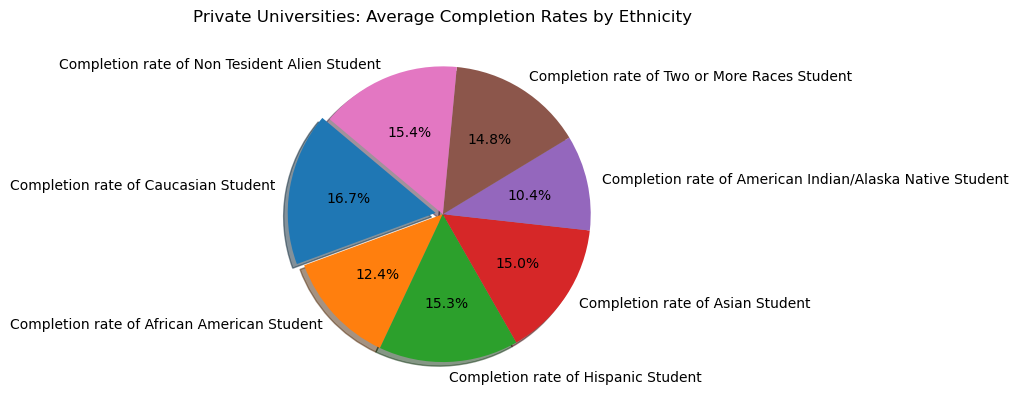

In [4]:
explode = (0.05, 0, 0, 0, 0 ,0 ,0)
plt.pie(average_ethnic_completion_rates, labels=average_ethnic_completion_rates.index, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140) 
plt.title('Private Universities: Average Completion Rates by Ethnicity')
plt.show()

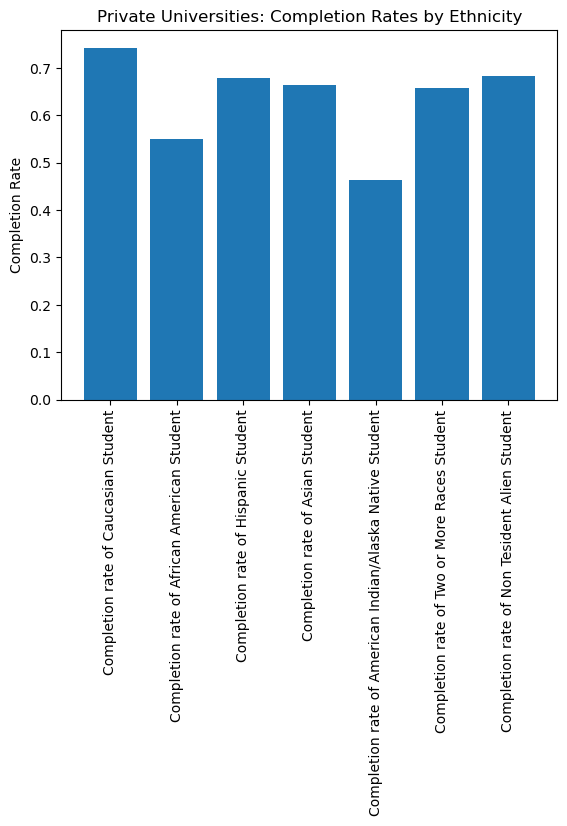

In [5]:
plt.bar(ethnicities, average_completion_rates) 
plt.ylabel("Completion Rate")
plt.title("Private Universities: Completion Rates by Ethnicity")
plt.xticks(rotation=90)
plt.show()

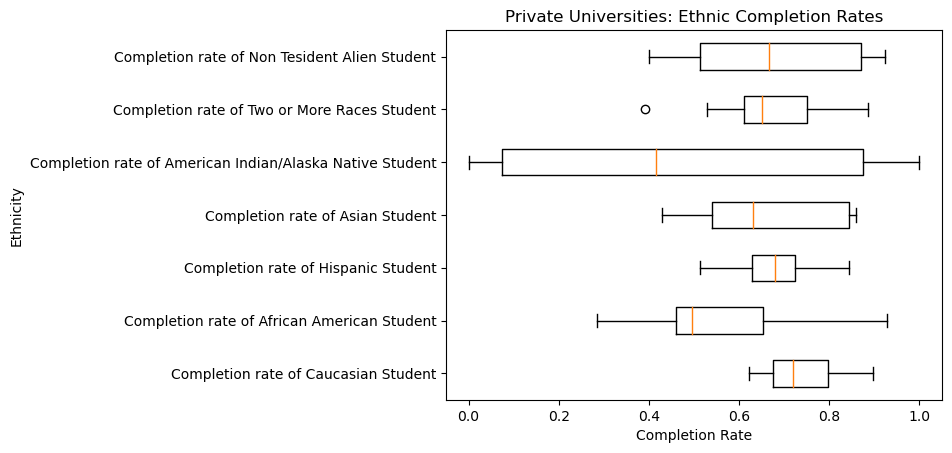

In [6]:

plt.boxplot(ethnic_completion_rates.values, labels=ethnic_completion_rates.columns, vert=False)
# values get values while columns get name
#overall box plot shows the vales of the compleation rates of the ethnicities - not using the overall average of the groups
plt.xlabel('Completion Rate')
plt.ylabel('Ethnicity')
plt.title('Private Universities: Ethnic Completion Rates')
plt.show()


Text(0.5, 1.0, 'Private Universities: Individual University Completion rate')

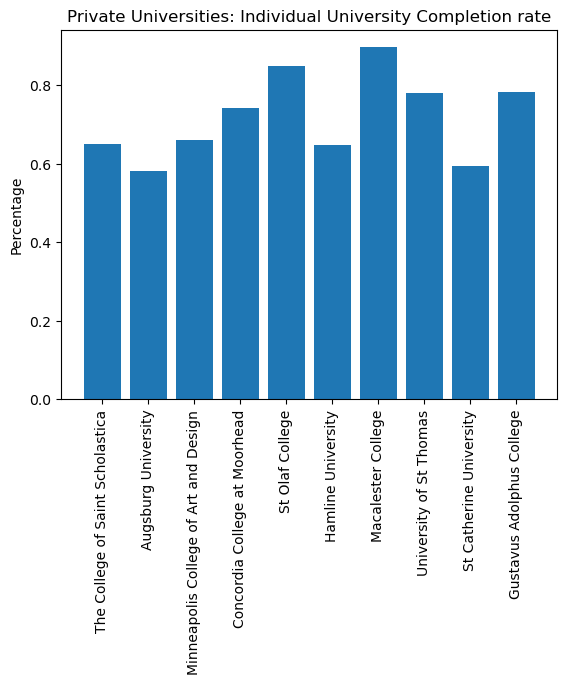

In [7]:
plt.bar(school, school_completion_rate)
plt.xticks(rotation=90)
plt.ylabel("Percentage")
plt.title("Private Universities: Individual University Completion rate")
